In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [4]:
df = pd.read_csv('/home/ataur/Downloads/Dataset_Assignment Clustering/AutoInsurance.csv')

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [13]:
df.drop(['State', 'Effective To Date'], axis=1, inplace=True)

Customer Lifetime Value              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Monthly Premium Auto              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Months Since Last Claim           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Months Since Policy Inception       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number of Open Complaints        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number of Policies               AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Claim Amount               AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

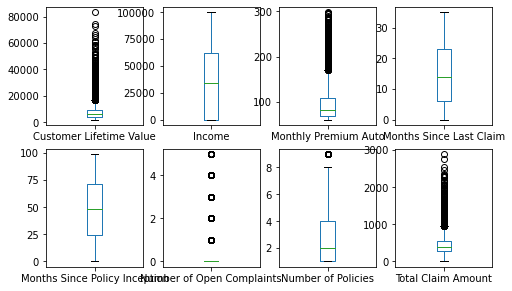

In [14]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(8,10))

## Outlier Treatment

In [15]:
# first column
iqr = df['Customer Lifetime Value'].quantile(0.75) - df['Customer Lifetime Value'].quantile(0.25)
iqr

4967.915247000001

In [17]:
lower_limit = df['Customer Lifetime Value'].quantile(0.25) - 1.5*(iqr)
lower_limit

-3457.6210762500014

In [20]:
upper_limit = df['Customer Lifetime Value'].quantile(0.75) + 1.5*(iqr)
upper_limit

16414.039911750002

In [21]:
df['Customer Lifetime Value'] = np.where(df['Customer Lifetime Value'] > upper_limit, upper_limit, np.where(df['Customer Lifetime Value'] < lower_limit, lower_limit, df['Customer Lifetime Value']))

In [22]:
# second column
iqr = df['Number of Policies'].quantile(0.75) - df['Number of Policies'].quantile(0.25)
iqr

3.0

In [23]:
lower_limit = df['Number of Policies'].quantile(0.25) - 1.5*(iqr)
lower_limit

-3.5

In [24]:
upper_limit = df['Number of Policies'].quantile(0.75) + 1.5*(iqr)
upper_limit

8.5

In [25]:
df['Number of Policies'] = np.where(df['Number of Policies'] > upper_limit, upper_limit, np.where(df['Number of Policies'] < lower_limit, lower_limit, df['Number of Policies']))

In [26]:
# Third column
iqr = df['Monthly Premium Auto'].quantile(0.75) - df['Monthly Premium Auto'].quantile(0.25)
iqr

41.0

In [27]:
lower_limit = df['Monthly Premium Auto'].quantile(0.25) - 1.5*(iqr)
lower_limit

6.5

In [28]:
upper_limit = df['Monthly Premium Auto'].quantile(0.75) + 1.5*(iqr)
upper_limit

170.5

In [29]:
df['Monthly Premium Auto'] = np.where(df['Monthly Premium Auto'] > upper_limit, upper_limit, np.where(df['Monthly Premium Auto'] < lower_limit, lower_limit, df['Monthly Premium Auto']))

In [30]:
# Forth column
iqr = df['Number of Open Complaints'].quantile(0.75) - df['Number of Open Complaints'].quantile(0.25)
iqr

0.0

In [31]:
lower_limit = df['Number of Open Complaints'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.0

In [32]:
upper_limit = df['Number of Open Complaints'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.0

In [33]:
df['Number of Open Complaints'] = np.where(df['Number of Open Complaints'] > upper_limit, upper_limit, np.where(df['Number of Open Complaints'] < lower_limit, lower_limit, df['Number of Open Complaints']))

In [34]:
# Fith column
iqr = df['Total Claim Amount'].quantile(0.75) - df['Total Claim Amount'].quantile(0.25)
iqr

275.2565942500001

In [35]:
lower_limit = df['Total Claim Amount'].quantile(0.25) - 1.5*(iqr)
lower_limit

-140.62664687500018

In [36]:
upper_limit = df['Total Claim Amount'].quantile(0.75) + 1.5*(iqr)
upper_limit

960.3997301250002

In [37]:
df['Total Claim Amount'] = np.where(df['Total Claim Amount'] > upper_limit, upper_limit, np.where(df['Total Claim Amount'] < lower_limit, lower_limit, df['Total Claim Amount']))

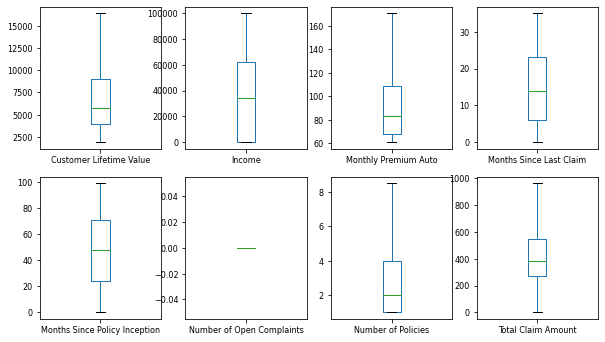

In [38]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(10,12));

In [39]:
df1 = df[['EmploymentStatus', 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies', 'Total Claim Amount']]

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EmploymentStatus               9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Income                         9134 non-null   int64  
 3   Monthly Premium Auto           9134 non-null   float64
 4   Months Since Last Claim        9134 non-null   int64  
 5   Months Since Policy Inception  9134 non-null   int64  
 6   Number of Policies             9134 non-null   float64
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 571.0+ KB


In [41]:
df1.head()

,EmploymentStatus,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,Employed,2763.519279,56274,69.0,32,5,1.0,384.811147
1,Unemployed,6979.535903,0,94.0,13,42,8.0,960.399730
2,Employed,12887.431650,48767,108.0,18,38,2.0,566.472247
3,Unemployed,7645.861827,0,106.0,18,65,7.0,529.881344
4,Employed,2813.692575,43836,73.0,12,44,1.0,138.130879


In [42]:
df1.duplicated().sum()

1090

In [43]:
df2 = df1.drop_duplicates()

In [44]:
df2.isnull().sum()

EmploymentStatus                 0
Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [45]:
df2.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000
mean,7185.889130,37537.235082,91.462208,15.152412,48.037295,2.960592,415.932242
std,4227.538069,30682.191293,28.573660,10.112565,28.018459,2.331943,243.752117
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.423014,0.000000,68.000000,6.000000,24.000000,1.000000,255.995434
50%,5809.097074,34077.500000,83.000000,14.000000,47.000000,2.000000,378.339796
75%,8923.123535,62447.250000,109.000000,23.000000,72.000000,4.000000,549.765871
max,16414.039912,99981.000000,170.500000,35.000000,99.000000,8.500000,960.399730


In [46]:
df2.duplicated().sum()

0

In [48]:
df2.head()

,EmploymentStatus,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,Employed,2763.519279,56274,69.0,32,5,1.0,384.811147
1,Unemployed,6979.535903,0,94.0,13,42,8.0,960.399730
2,Employed,12887.431650,48767,108.0,18,38,2.0,566.472247
3,Unemployed,7645.861827,0,106.0,18,65,7.0,529.881344
4,Employed,2813.692575,43836,73.0,12,44,1.0,138.130879


In [47]:
def Norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [49]:
df_norm = Norm_func(df2.iloc[:,1:])

In [50]:
df_norm.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000,8044.000000
mean,0.364279,0.375444,0.278194,0.432926,0.485225,0.261412,0.433024
std,0.291232,0.306880,0.260947,0.288930,0.283015,0.310926,0.253829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145798,0.000000,0.063927,0.171429,0.242424,0.000000,0.266475
50%,0.269432,0.340840,0.200913,0.400000,0.474747,0.133333,0.393877
75%,0.483956,0.624591,0.438356,0.657143,0.727273,0.400000,0.572390
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.isnull().sum()

Customer                         0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Dendrogram

In [52]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

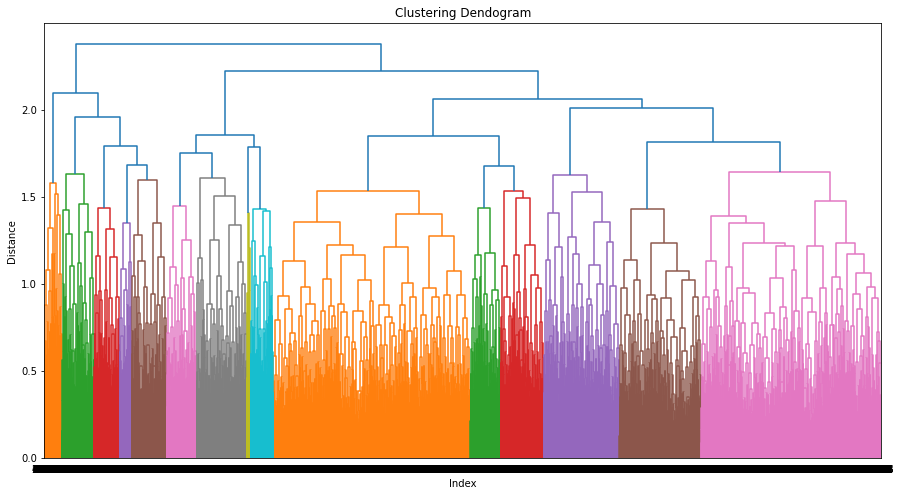

In [55]:
plt.figure(figsize=(15,8));plt.title('Clustering Dendogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

# AgglimerativeClustering

In [57]:
h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([4, 0, 1, ..., 0, 0, 0])

In [58]:
cluster_labels = pd.Series(h_complete.labels_)

In [59]:
df["Clust"] = cluster_labels

In [60]:
df.head()

,Customer,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Clust
0,BU79786,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,4.0
1,QZ44356,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,960.399730,Four-Door Car,Medsize,0.0
2,AI49188,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1.0
3,WW63253,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0.0
4,HB64268,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.0


In [ ]:
df3 = df.iloc[]